# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

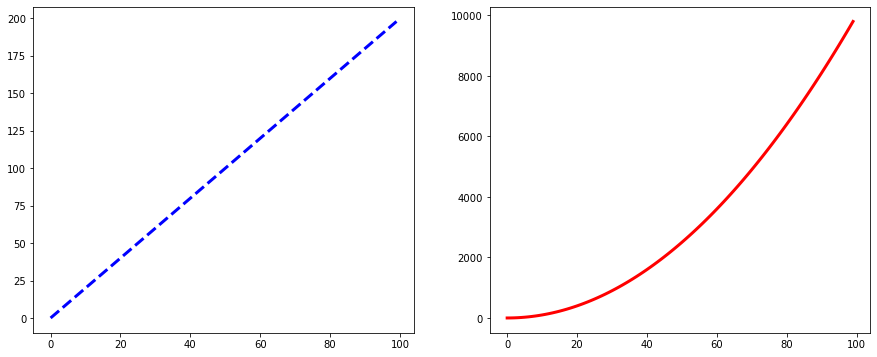

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(15,6))

# First plot
plt.subplot(1,2,1)
plt.plot(x, y, lw=3, color="b", ls='--')

# Second plot
plt.subplot(1,2,2)
plt.plot(x, z, lw=3, color="r", ls='-')

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

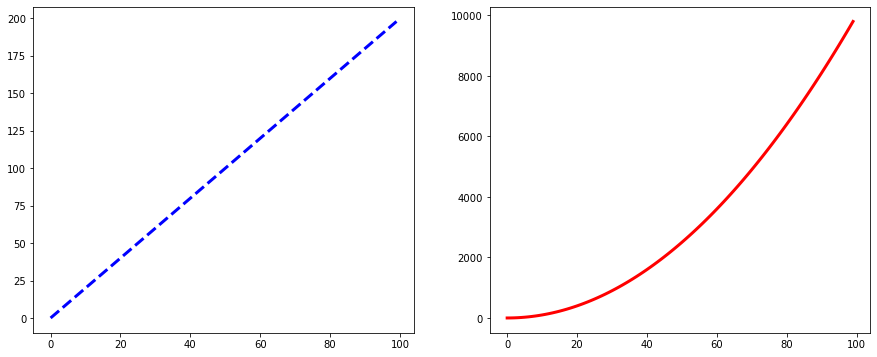

In [4]:
# OPTION 2

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1,2)
f.set_figwidth(15)
f.set_figheight(6)

# Plots
ax[0].plot(x, y, color="b", lw=3, ls='--')
ax[1].plot(x, z, color="r", lw=3, ls='-')

# Show the plot
plt.show()

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

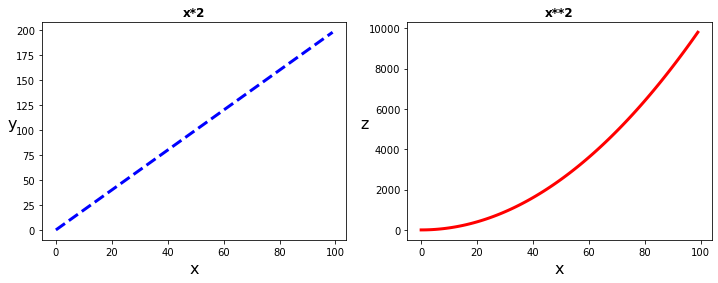

In [5]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1,2, figsize=(12,4))

# First plot adding a title and x and y labels
ax[0].plot(x, y, color="b", lw=lw, ls='--')
ax[0].set_xlabel('x', fontsize = fs)
ax[0].set_ylabel('y', rotation = y_rot, fontsize = fs)
ax[0].set_title('x*2', fontweight = fw)

# Second plot adding a title and x and y labels
ax[1].plot(x, z, color="r", lw=lw, ls='-')
ax[1].set_xlabel('x', fontsize = fs)
ax[1].set_ylabel('z', rotation = y_rot, fontsize = fs)
ax[1].set_title('x**2', fontweight = fw)

# Show the plot
plt.show()

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

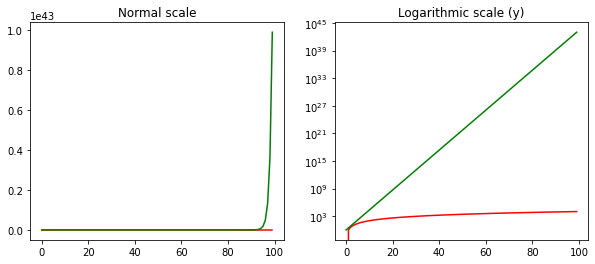

In [6]:
# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 2, figsize=(10,4))

# Normal plot
ax[0].plot(x, x**2, 'r', x, np.exp(x), 'g')
ax[0].set_title("Normal scale")

# Logarithmic scale
ax[1].plot(x, x**2, 'r', x, np.exp(x), 'g')
ax[1].set_yscale("log")
ax[1].set_title("Logarithmic scale (y)")

# Show plot
plt.show()

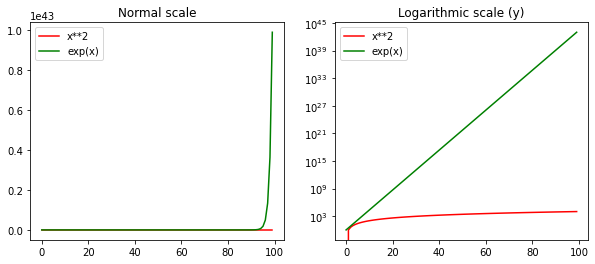

In [7]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 2, figsize=(10,4))

# Normal plot
ax[0].plot(x, x**2, 'r', label = 'x**2')
ax[0].plot(x, np.exp(x), 'g', label = 'exp(x)')
ax[0].set_title("Normal scale")
ax[0].legend()

# Logarithmic scale
ax[1].plot(x, x**2, 'r', label = 'x**2')
ax[1].plot(x, np.exp(x), 'g', label = 'exp(x)')
ax[1].set_yscale("log")
ax[1].set_title("Logarithmic scale (y)")
ax[1].legend()

# Show plot
plt.show()

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit. 

In [8]:
# Read the data
fitbit = pd.read_csv('data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

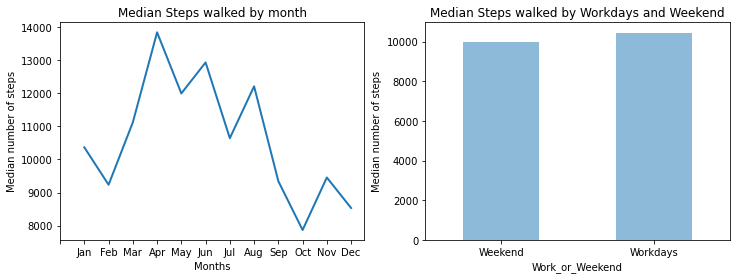

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
weekday_steps = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1,2, figsize = (12,4))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])

# Plot the weekday steps in the current axes
weekday_steps.plot(kind = 'line',linewidth=2)

# Add labels, title, etc
plt.ylabel('Median number of steps')
plt.xlabel('Months')
plt.title('Median Steps walked by month')
plt.xticks(range(13), ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Save the figure
plt.savefig('figures/steps_months.png',bbox_inches='tight')

# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])

# Find the median steps for workdays and weekdays
weekday_steps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()

# Plot the workday and weekend steps in the current axes
weekday_steps.plot(kind = 'bar', alpha = 0.5)

# Add labels, title, etc
plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(range(2), ['Weekend','Workdays'], rotation = 0)

# Save the figure
plt.savefig('figures/steps_work_weekend.png', bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

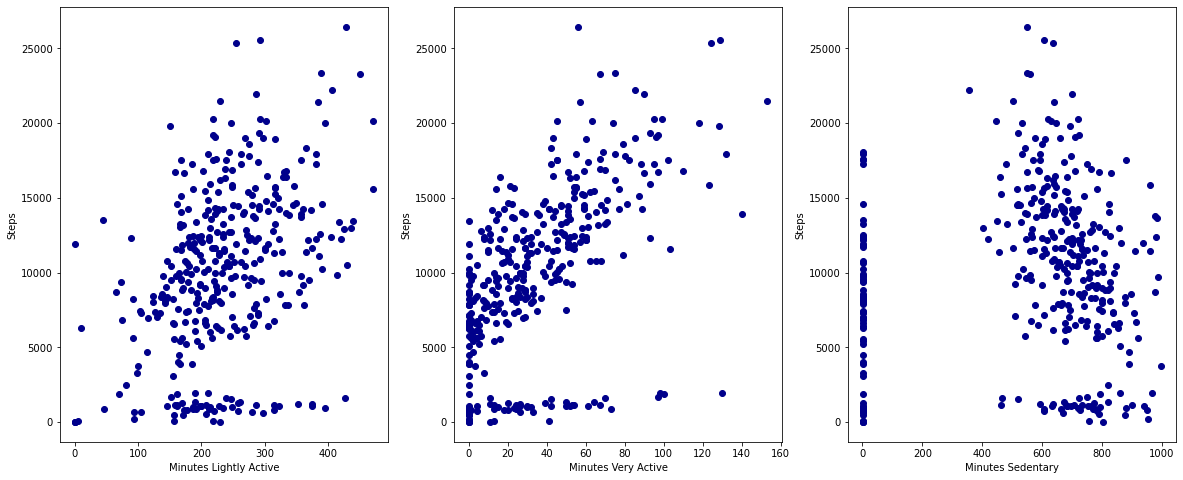

In [10]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df = fitbit[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 3, figsize = (20,8))

# Iterate to draw each scatter plot
for i in range(3):
    plt.sca(ax[i])
    plt.scatter(df[cols[i]], df[cols[3]], color = 'darkblue')
    plt.xlabel(df[cols[i]].name)
    plt.ylabel('Steps')

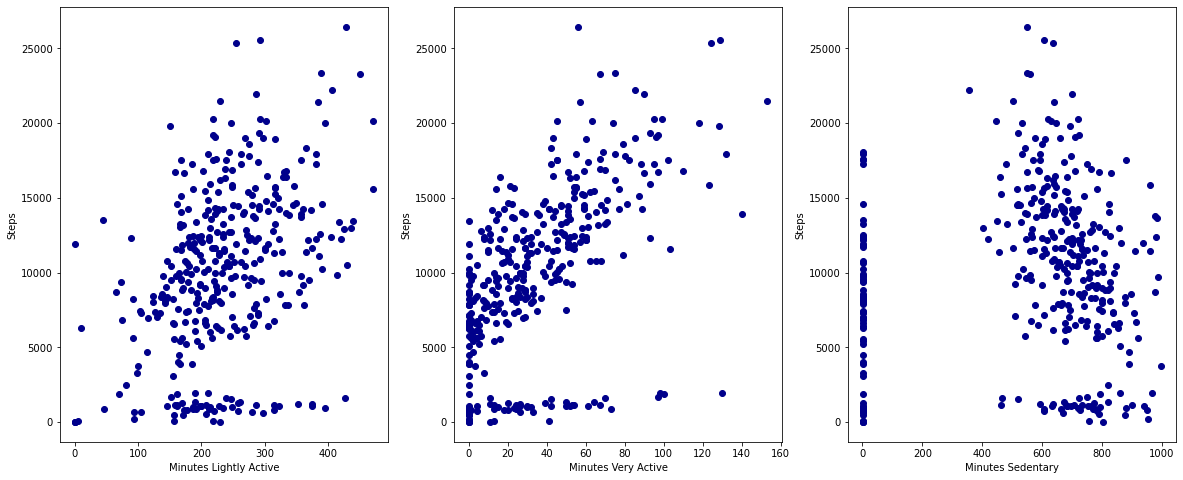

In [11]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df = fitbit[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 3, figsize = (20,8))

# Iterate to draw each scatter plot
for i in range(3):
    ax[i].scatter(df[cols[i]], df[cols[3]], color = 'darkblue')
    ax[i].set_xlabel(df[cols[i]].name)
    ax[i].set_ylabel('Steps')